# <span id="toc">  Esercitazione 3 - Option Pricing</span>

[  Option Pricing ](#ex-3.0)

[  3.1 - Direct sampling ](#ex-3.1)

[  3.2 - Discretized sampling ](#ex-3.2)

### <span id="ex-3.0">  Option Pricing </span>[^](#toc)

In questa esercitazione voglio verificare numericamente la soluzione analitica al problema dell'Option Pricing fornita dalla teoria di Black-Scholes per il corretto prezzamento delle opzioni europee di tipo Call e Put. Questa teoria assume che l'evoluzione nel tempo del prezzo di un *asset* sia stocastica e che mostri un comportamento analogo a quello di un Moto Browniano Geometrico (GBM) con rate di interesse *risk-free* costante $r$ (equivalente del *drift* browniano) e volatilità $\sigma$.

In finanza un'opzione è un contratto tra due (o più) parti di cui una assume un onere mentre l'altra può esercitare un diritto.  
L'opzione più semplice è quella **europea**: chi vende l'opzione (diciamo **A**) *garantisce* a chi la compra (**B**) il diritto a comprare o a vendere un certo *asset* ad un prezzo fissato $K$ ad un istante fissato $T$ (scadenza del contratto). NOTA: solo **A** è vincolato dal contratto, mentre **B** può decidere di esercitare il diritto di vendere o comprare l'asset solo se ne ricava un profitto.  
Il **profitto** è possibile solo se alla scadenza $T$ il prezzo di mercado dell'asset $S(T)$ è maggiore di $K$. In tal caso **B** esercita una *Call option* (acquista l'asset), con profitto $S-K$. Viceversa, se $S(T)<K$, **B** vorrà esercitare una *Put option* (vendere l'asset), con profitto $K-S$.


Nella la teoria di B.-S., l'asset ha un prezzo $S\sim GBM(\mu,\sigma^2)$, con valore iniziale $S(0)$, e varia nel tempo come
$$
S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]
$$
dove $W(t)\sim\mathcal{N}(0,t)$ i.e. distribuzione normale centrata in $0$, con $STD=t$ ([generazione diretta](#ex-3.1)).

Inoltre, essendo gli incrementi di $W$ indipendenti e distribuiti in modo normale, si può campionare $S_{t_i}$ ricorsivamente secondo la legge
$$
S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]
$$
con $Z_i \sim \mathcal{N}(0,1)$ e $t_i$ istanti di tempo successivi nell'intervallo $[0,t]$ ([generazione discreta](#ex-3.2)).


Per entrambi i casi voglio calcolare i prezzi delle opzioni Call e Put, antiesponenziando per tornare al tempo iniziale dopo aver simulato il prezzo finale $S(T)$. Essi sono
$$
C[S(0),0] = e^{-rT} max(0,S-K)\\                  
P(S(0),0) = e^{-rT} max(0,K-S)
$$
dove l'operazione di ```max(0,X)``` indica la libertà di **B** di esercitare o meno l'opzione e il fattore esponenziale tiene conto del confronto con il tasso di interesse applicato da una banca a un ipotetico deposito versato al tempo iniziale $t_0=0$ (come alternativa all'acquisto dell'opzione).


Per entrambe le simulazioni uso i seguenti parametri:
- prezzo dell'asset a $t=0$: $S(0)=100$
- scadenza: $T=1$
- prezzo fissato da contratto: $K=100$
- tasso di interesse per investimento risk-free: $r=0.1$
- volatilità: $\sigma=0.25$

## <span id="ex-3.1">  Esercizio 3.1 </span>[^](#toc)

In questo caso ho campionato **direttamente** (quindi in un unico step) il prezzo finale dell'asset $S(T)$, in analogia a un moto $GBM(r,\sigma^2)$.

Per la simulazione ho ripetuto $10^4$ campionamenti, e li ho suddivisi per il data-blocking in $100$ blocchi. Ricordo che il data-blocking è funzionale all'osservazione dell'andamento delle stime dei risultati e dei relativi errori durante la simulazione.

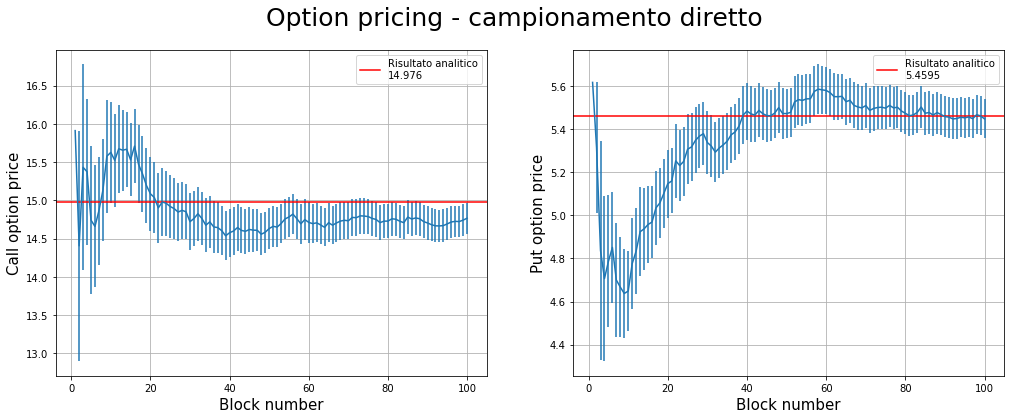

Risultato finale Call: 
14.7669
Incertezza statistica : 
0.203308

Risultato finale Put: 
5.44741
Incertezza statistica : 
0.0908553


In [20]:
# direct: CALL and PUT

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

fig=plt.figure(figsize=(17,6))
plt.suptitle("Option pricing - campionamento diretto", fontsize = 25)

plt.subplot(1,2,1)
aveC, errC = np.loadtxt("ex3-1/direct.out", usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x, aveC, yerr = errC)
plt.ylabel('Call option price', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
plt.axhline(y=14.98, color = 'r', linestyle = '-', label = "Risultato analitico\n14.976")
plt.legend()

plt.subplot(1,2,2)
aveP, errP = np.loadtxt("ex3-1/direct.out", usecols=(2,3), delimiter=' ', unpack='true')
plt.errorbar(x, aveP, yerr = errP)
plt.ylabel('Put option price', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
plt.axhline(y=5.46, color = 'r', linestyle = '-', label = "Risultato analitico\n5.4595")
plt.legend()

plt.show()

print('Risultato finale Call: ')
print(aveC[-1])
print('Incertezza statistica : ')
print(errC[-1])

print('\nRisultato finale Put: ')
print(aveP[-1])
print('Incertezza statistica : ')
print(errP[-1])

## <span id="ex-3.2">  Esercizio 3.2 </span>[^](#toc)

In questo caso ho campionato a **tempi discreti** ricorsivamente il prezzo istantaneo dell'asset, sempre in analogia a un moto $GBM(r,\sigma^2)$, seguendo perciò il "cammino" descritto dall'asset nell'intervallo di tempo $[0,T]$.

Per farlo, ho diviso l'intervallo $[0,T]$ in $100$ intervalli di tempo discreti (= passi del GBM), per ciascuno dei quali ho calcolato il valore dell'asset $S(t_0), S(t_1), S(t_2), ... , S(T)$.

Per la simulazione ho ripetuto $10^4$ cammini e suddiviso per il data-blocking in $100$ blocchi.

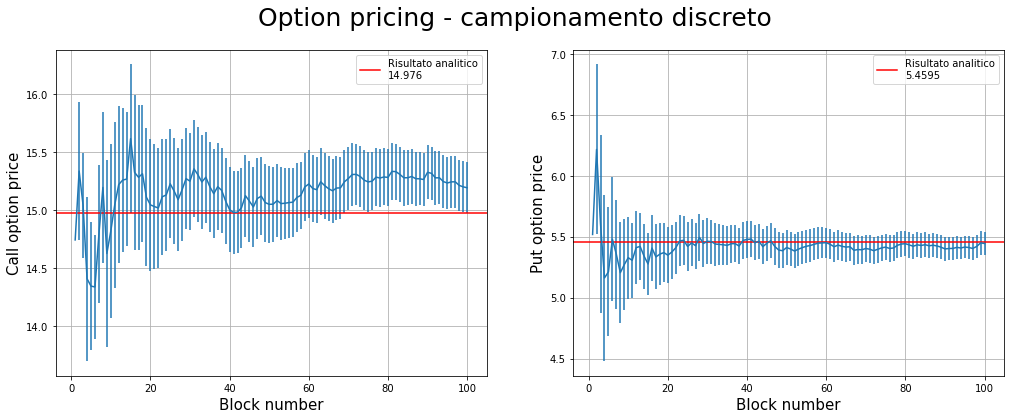

Risultato finale Call: 
15.1936
Incertezza statistica : 
0.217683

Risultato finale Put: 
5.44461
Incertezza statistica : 
0.0950282


In [21]:
#discretized: CALL and PUT

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

fig=plt.figure(figsize=(17,6))
plt.suptitle("Option pricing - campionamento discreto", fontsize = 25)

plt.subplot(1,2,1)
aveC, errC = np.loadtxt("ex3-1/discretized.out", usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x, aveC, yerr = errC)
plt.ylabel('Call option price', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
plt.axhline(y=14.98, color = 'r', linestyle = '-',label = "Risultato analitico\n14.976")
plt.legend()

plt.subplot(1,2,2)
aveP, errP = np.loadtxt("ex3-1/discretized.out", usecols=(2,3), delimiter=' ', unpack='true')
plt.errorbar(x, aveP, yerr = errP)
plt.ylabel('Put option price', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
plt.axhline(y=5.46, color = 'r', linestyle = '-', label = "Risultato analitico\n5.4595")
plt.legend()

plt.show()

print('Risultato finale Call: ')
print(aveC[-1])
print('Incertezza statistica : ')
print(errC[-1])

print('\nRisultato finale Put: ')
print(aveP[-1])
print('Incertezza statistica : ')
print(errP[-1])

### Conclusioni

In tutti i casi i risultati sono compatibili con la soluzione analitica entro $\approx 1\,\sigma$, perciò la verifica si può considerare andata a buon fine.